In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import seaborn as sns
plt.style.use('seaborn-white')

In [2]:
directory = '../../../data/raw/ucx_tests/results'

In [3]:
get_df = pd.read_csv(directory + "/" + "get_client.csv", skiprows=1)
put_lat_df = pd.read_csv(directory + "/" + "put_lat_client.csv", skiprows=1)
stream_lat_df = pd.read_csv(directory + "/" + "stream_lat_client.csv", skiprows=1)

In [4]:
def testname_to_cols(dataframe):
    df = dataframe.iloc[:, 0].str.extract(r'([a-zA-Z]+)_(?:[a-zA-Z]+_)?(\d+)')
    dataframe["operation"] = df[0]
    dataframe["message_size"] = df[1].astype("int64")

In [5]:
testname_to_cols(get_df)
testname_to_cols(put_lat_df)
testname_to_cols(stream_lat_df)

In [6]:
ucx_df = pd.DataFrame()
for df in [get_df, put_lat_df, stream_lat_df]:
    ucx_df = pd.concat([ucx_df, df[["operation", "message_size", "avg_bw", "avg_mr", "avg_lat"]]])
# Clean up calculation
ucx_df["avg_bw"] = ucx_df["avg_mr"] * ucx_df["message_size"] / (1000. * 1000)
ucx_df.head()

,operation,message_size,avg_bw,avg_mr,avg_lat
0,GET,2,1.107626,553813,1.806
1,GET,4,2.337472,584368,1.711
2,GET,8,4.451168,556396,1.797
3,GET,16,9.306928,581683,1.719
4,GET,32,17.717056,553658,1.806


In [7]:
ucx_df[ucx_df["operation"] == "PUT"]

,operation,message_size,avg_bw,avg_mr,avg_lat
0,PUT,2,2.220556,1110278,0.901
1,PUT,4,4.427424,1106856,0.903
2,PUT,8,8.853552,1106694,0.904
3,PUT,16,17.693552,1105847,0.904
4,PUT,32,32.953344,1029792,0.971
5,PUT,64,66.805696,1043839,0.958
6,PUT,128,126.820224,990783,1.009
7,PUT,256,209.839360,819685,1.220
8,PUT,512,401.890304,784942,1.274
9,PUT,1024,707.961856,691369,1.446


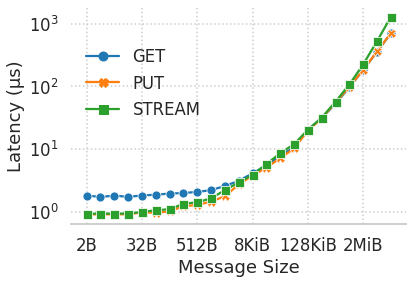

In [14]:
fig, ax = plt.subplots()
sns.set_context('talk')
sns.set_style('whitegrid', {'grid.linestyle': 'dotted'})
sns.despine(left=True)
g = sns.lineplot(x="message_size", y="avg_lat", hue="operation", style="operation", markers=True, dashes=False, data=ucx_df, ax=ax)
g.set_ylabel("Latency (μs)")
g.set_xlabel("Message Size")
ax.set(xscale="log", yscale="log")
g.set_xticks([2**i for i in range(1, 24, 4)])
g.set_xticklabels(['2B','32B','512B','8KiB', '128KiB', '2MiB'])
# g.set_yticks([1, 10, 100, 1000])
# g.set_yticklabels([1, 10, 100, 1000])
legend = ax.legend()
legend.texts[0].set_text("")
fig.savefig("latency.pdf", bbox_inches="tight", dpi=600)
plt.show()

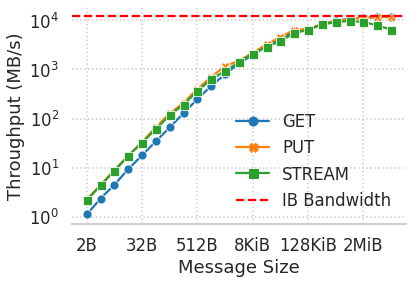

In [13]:
fig, ax = plt.subplots()
sns.set_context('talk')
sns.set_style('whitegrid', {'grid.linestyle': 'dotted'})
sns.despine(left=True)
g = sns.lineplot(x="message_size", y="avg_bw", hue="operation", style="operation", markers=True, dashes=False, data=ucx_df, ax=ax)
g.set_ylabel("Throughput (MB/s)")
g.set_xlabel("Message Size")
ax.set(xscale="log", yscale="log")
g.set_xticks([2**i for i in range(1, 24, 4)])
g.set_xticklabels(['2B','32B','512B','8KiB', '128KiB', '2MiB'])
plt.axhline(y=12500, color='r', ls='--', label="IB Bandwidth")
# g.set_yticks([1, 10, 100, 1000])
# g.set_yticklabels([1, 10, 100, 1000])
legend = ax.legend()
legend.texts[0].set_text("")
fig.savefig("throughput.pdf", bbox_inches="tight", dpi=600)
plt.show()

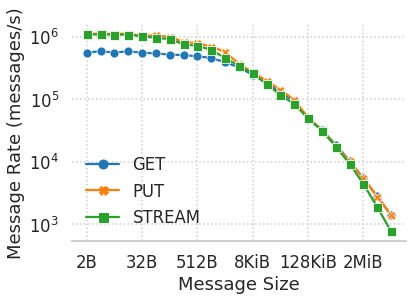

In [12]:
fig, ax = plt.subplots()
sns.set_context('talk')
sns.set_style('whitegrid', {'grid.linestyle': 'dotted'})
sns.despine(left=True)
g = sns.lineplot(x="message_size", y="avg_mr", hue="operation", style="operation", markers=True, dashes=False, data=ucx_df, ax=ax)
g.set_ylabel("Message Rate (messages/s)")
g.set_xlabel("Message Size")
ax.set(xscale="log", yscale="log")
g.set_xticks([2**i for i in range(1, 24, 4)])
g.set_xticklabels(['2B','32B','512B','8KiB', '128KiB', '2MiB'])
# g.set_yticks([1, 10, 100, 1000])
# g.set_yticklabels([1, 10, 100, 1000])
legend = ax.legend()
legend.texts[0].set_text("")
fig.savefig("message_rate.pdf", bbox_inches="tight", dpi=600)
plt.show()